LEVEL 18 — COMPLETE FOOD DELIVERY MINI PROJECT 

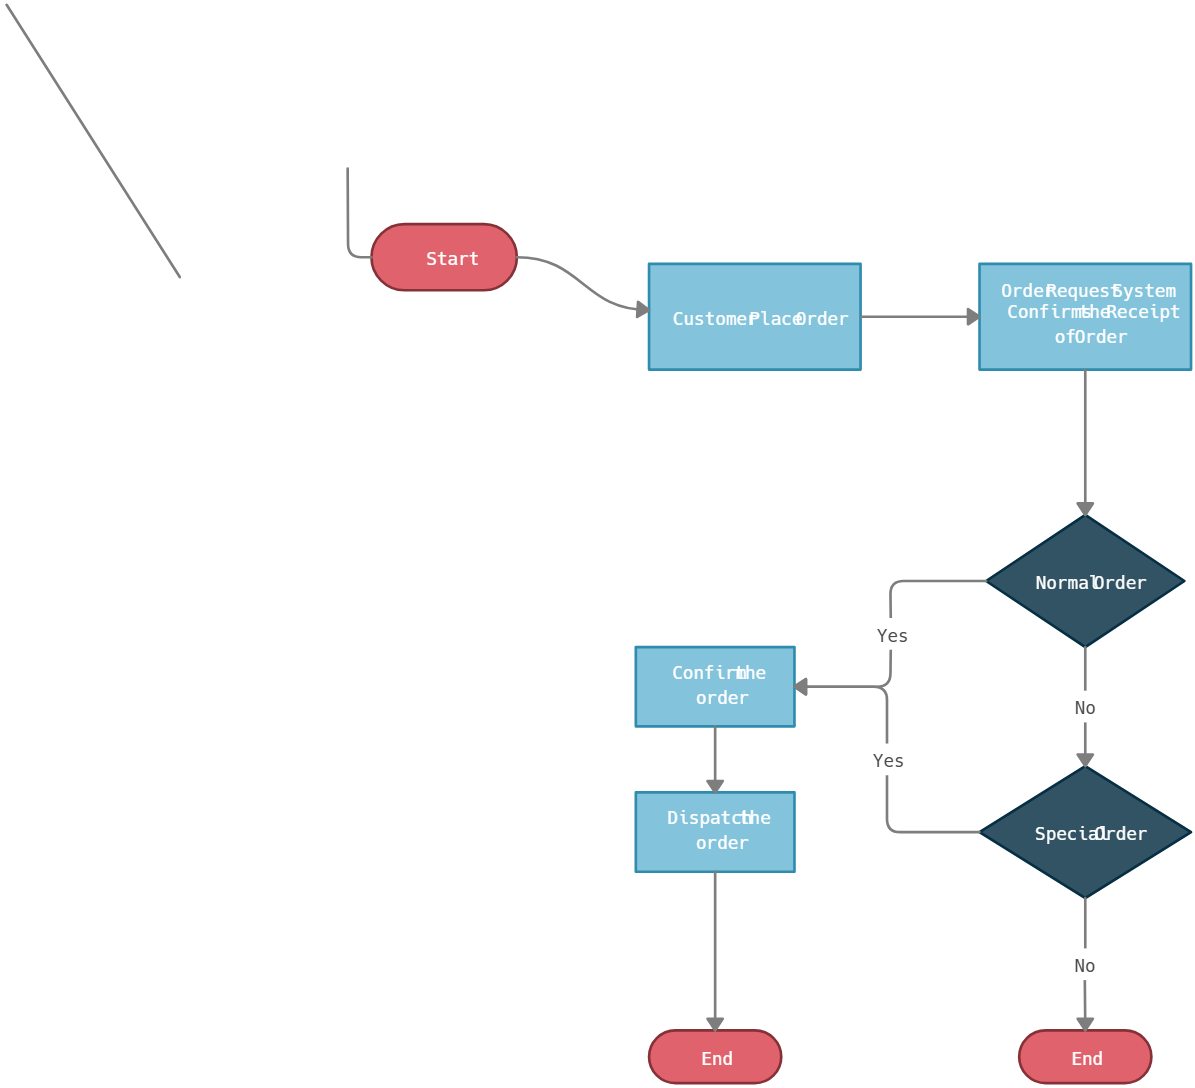
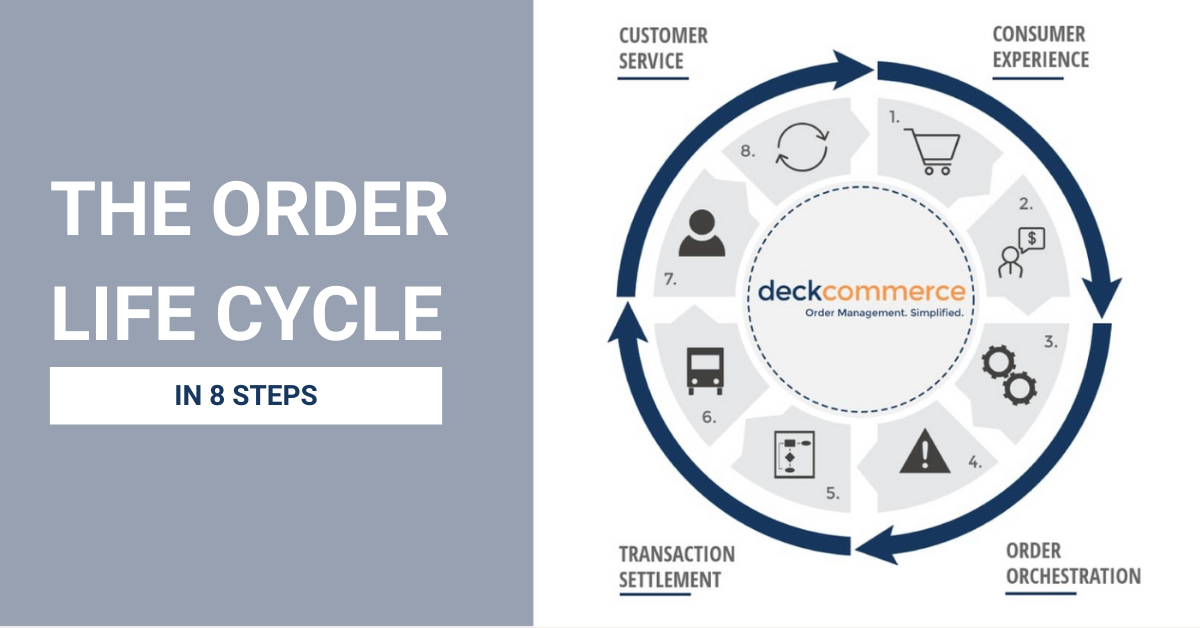
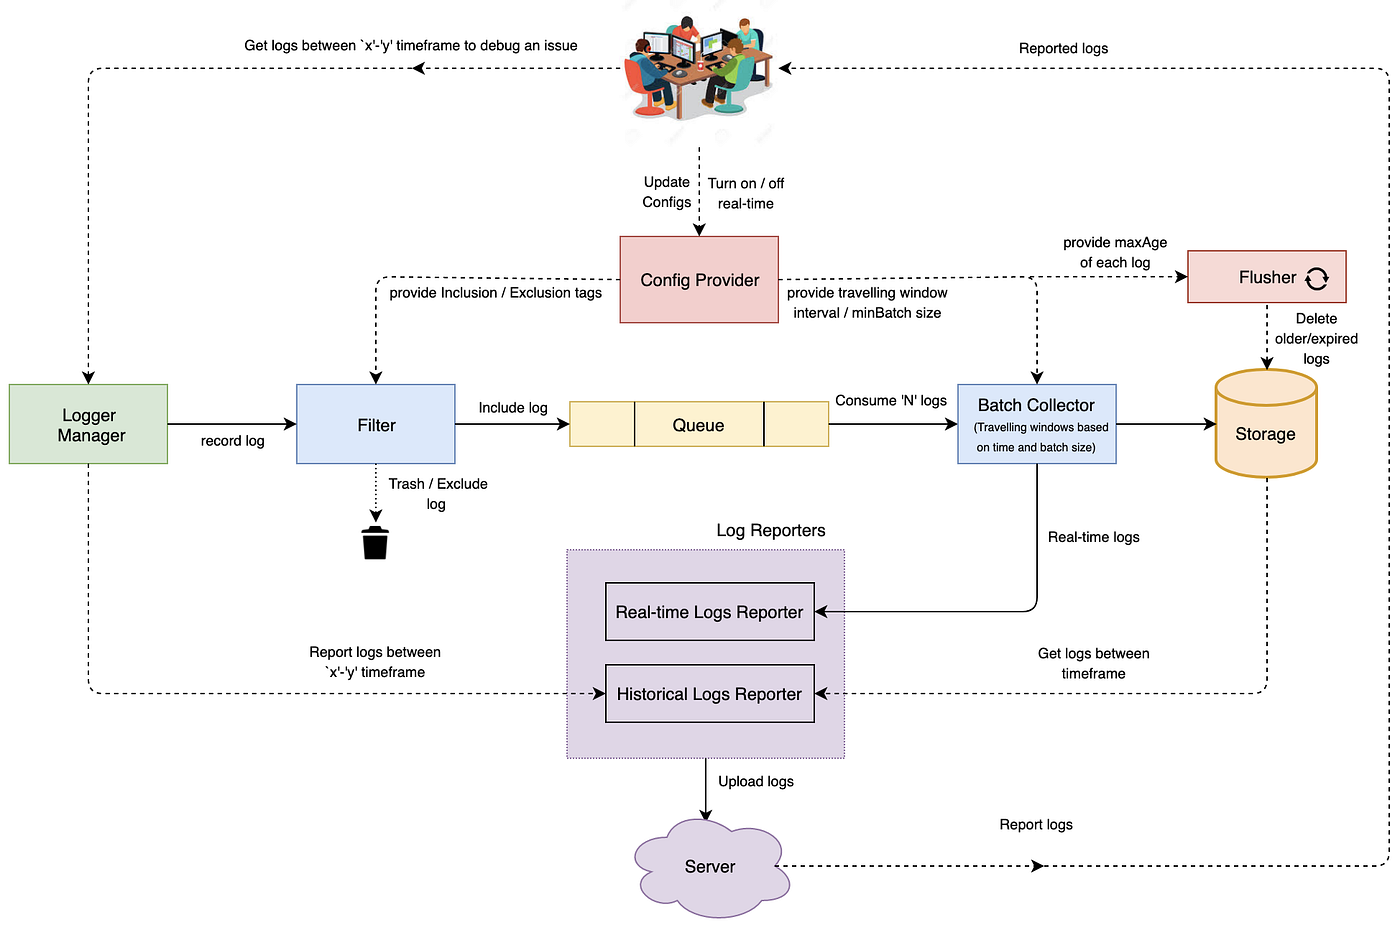

Flow:
- User places order
- Rate limiter checks spam
- Order is created
- Order goes into queue
- Worker processes order
- Delivery partner assigned
- Order delivered

In [1]:
import time
from collections import deque

# -------------------------
# MODELS
# -------------------------

class User:
    def __init__(self, user_id, name):
        self.user_id = user_id
        self.name = name


class Food:
    def __init__(self, name, price):
        self.name = name
        self.price = price


class Restaurant:
    def __init__(self, name):
        self.name = name
        self.menu = []

    def add_food(self, food):
        self.menu.append(food)


class Order:
    def __init__(self, order_id, user, restaurant, food_items):
        self.order_id = order_id
        self.user = user
        self.restaurant = restaurant
        self.food_items = food_items
        self.status = "CREATED"


class DeliveryPartner:
    def __init__(self, name):
        self.name = name
        self.available = True


# -------------------------
# SERVICES
# -------------------------

class OrderService:
    def __init__(self):
        self.orders = {}
        self.next_id = 1

    def place_order(self, user, restaurant, food_items):
        order = Order(self.next_id, user, restaurant, food_items)
        self.orders[self.next_id] = order
        self.next_id += 1
        print(f"[ORDER CREATED] Order ID {order.order_id}")
        return order


class Cache:
    def __init__(self):
        self.data = {}

    def get(self, key):
        return self.data.get(key)

    def set(self, key, value):
        self.data[key] = value


class RateLimiter:
    def __init__(self, limit, window):
        self.limit = limit
        self.window = window
        self.calls = {}

    def allow(self, user_id):
        now = time.time()
        if user_id not in self.calls:
            self.calls[user_id] = []

        self.calls[user_id] = [
            t for t in self.calls[user_id]
            if now - t < self.window
        ]

        if len(self.calls[user_id]) < self.limit:
            self.calls[user_id].append(now)
            return True
        return False


class MessageQueue:
    def __init__(self):
        self.queue = deque()

    def push(self, item):
        self.queue.append(item)

    def pop(self):
        if self.queue:
            return self.queue.popleft()
        return None


# -------------------------
# HELPERS
# -------------------------

def update_status(order, status):
    print(f"[STATUS] Order {order.order_id}: {order.status} → {status}")
    order.status = status


def assign_delivery(order, partners):
    for partner in partners:
        if partner.available:
            partner.available = False
            update_status(order, "OUT_FOR_DELIVERY")
            print(f"[DELIVERY] {partner.name} assigned")
            return
    print("[DELIVERY] No partner available")


# -------------------------
# MAIN APPLICATION
# -------------------------

def main():
    # users
    user = User(1, "Priyanshu")

    # restaurant & food
    pizza = Food("Pizza", 250)
    burger = Food("Burger", 150)

    restaurant = Restaurant("Dominos")
    restaurant.add_food(pizza)
    restaurant.add_food(burger)

    # services
    order_service = OrderService()
    cache = Cache()
    rate_limiter = RateLimiter(limit=2, window=10)
    queue = MessageQueue()

    # delivery partners
    partners = [DeliveryPartner("Ravi")]

    # user requests order
    print("\nUser tries to place order...\n")

    if rate_limiter.allow(user.user_id):
        order = order_service.place_order(user, restaurant, [pizza])
        queue.push(order)
    else:
        print("❌ Rate limit exceeded")
        return

    # worker processing order
    print("\nProcessing orders...\n")

    order = queue.pop()
    if order:
        update_status(order, "CONFIRMED")
        time.sleep(1)

        update_status(order, "PREPARING")
        time.sleep(1)

        assign_delivery(order, partners)
        time.sleep(1)

        update_status(order, "DELIVERED")
        print("\n✅ Order completed successfully\n")


if __name__ == "__main__":
    main()


User tries to place order...

[ORDER CREATED] Order ID 1

Processing orders...

[STATUS] Order 1: CREATED → CONFIRMED
[STATUS] Order 1: CONFIRMED → PREPARING
[STATUS] Order 1: PREPARING → OUT_FOR_DELIVERY
[DELIVERY] Ravi assigned
[STATUS] Order 1: OUT_FOR_DELIVERY → DELIVERED

✅ Order completed successfully



# WHAT YOU JUST BUILT 

Without formally studying **System Design**, you have **naturally implemented real backend concepts** that are used in large-scale production systems.

## Concept Mapping

| Concept | Where Used |
|-------|------------|
| Backend service | `OrderService` |
| Cache | `Cache` |
| Rate limiting | `RateLimiter` |
| Message queue | `MessageQueue` |
| Async processing | `Queue + Worker` |
| State machine | `Order Status Flow` |
| Scalability logic | `Decoupled Services` |

## Why This Matters

You are already thinking like a **backend engineer**, not just a coder.

- You separated responsibilities instead of writing one monolithic function  
- You handled load using queues and async workers  
- You modeled order flow using states  
- You designed components that can scale independently  

## Industry Relevance

This exact thinking pattern is used in **real-world backend systems** such as:

- Food delivery platforms  
- E-commerce order processing  
- Payment systems  
- Notification pipelines  

👉 **This is real backend thinking used in Swiggy / Zomato–level systems.**

## Key Takeaway

You didn’t memorize system design terms.  
You **discovered them by building**.

That’s the strongest way to learn backend engineering.